In [1]:
import pandas as pd
import numpy as np

In [2]:
temporal = pd.read_csv('temporal.csv', encoding_errors ='ignore')

In [3]:
temporal.head()

,Mes,data science,machine learning,deep learning,categorical
0,2004-01-01,12,18,4,1
1,2004-02-01,12,21,2,1
2,2004-03-01,9,21,2,1
3,2004-04-01,10,16,4,1
4,2004-05-01,7,14,3,1


In [4]:
temporal.describe()

,data science,machine learning,deep learning,categorical
count,194.000000,194.000000,194.000000,194.000000
mean,20.953608,27.396907,24.231959,0.257732
std,23.951006,28.091490,34.476887,0.438517
min,4.000000,7.000000,1.000000,0.000000
25%,6.000000,9.000000,2.000000,0.000000
50%,8.000000,13.000000,3.000000,0.000000
75%,26.750000,31.500000,34.000000,1.000000
max,100.000000,100.000000,100.000000,1.000000


In [5]:
temporal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Mes               194 non-null    object
 1   data science      194 non-null    int64 
 2   machine learning  194 non-null    int64 
 3   deep learning     194 non-null    int64 
 4   categorical       194 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.7+ KB


In [6]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [7]:
format_dict = {'data science': '${0:,.2f}', 'Mes':'{:%m-%Y}','machine learning':'{:.2%}'}
temporal['Mes'] = pd.to_datetime(temporal['Mes'])
temporal.head().style.format(format_dict)

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,$12.00,1800.00%,4,1
1,02-2004,$12.00,2100.00%,2,1
2,03-2004,$9.00,2100.00%,2,1
3,04-2004,$10.00,1600.00%,4,1
4,05-2004,$7.00,1400.00%,3,1


In [22]:
format_dict ={'Mes': '{:%m-%Y}'}
#simplified format dictionary with values that do not make sense for our data
temporal.head().style.format(format_dict).highlight_max(color= 'darkgreen').highlight_min(color='orange')

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,12,18,4,1
1,02-2004,12,21,2,1
2,03-2004,9,21,2,1
3,04-2004,10,16,4,1
4,05-2004,7,14,3,1


In [9]:
temporal.head(10).style.format(format_dict).background_gradient(subset=['data science','machine learning'], cmap= 'BuGn')

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,12,18,4,1
1,02-2004,12,21,2,1
2,03-2004,9,21,2,1
3,04-2004,10,16,4,1
4,05-2004,7,14,3,1
5,06-2004,9,17,3,1
6,07-2004,9,16,3,1
7,08-2004,7,14,3,1
8,09-2004,10,17,4,1
9,10-2004,8,17,4,1


In [10]:
temporal.head().style.format(format_dict).bar(color='red', subset= ['data science','deep learning'])

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,12,18,4,1
1,02-2004,12,21,2,1
2,03-2004,9,21,2,1
3,04-2004,10,16,4,1
4,05-2004,7,14,3,1


In [11]:
temporal.head().style.format(format_dict).background_gradient(subset=['data science', 'machine learning'], cmap='BuGn').highlight_max(color='yellow')

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,12,18,4,1
1,02-2004,12,21,2,1
2,03-2004,9,21,2,1
3,04-2004,10,16,4,1
4,05-2004,7,14,3,1


In [12]:
import pandas_profiling as pp

In [13]:
import matplotlib.pyplot as plt
plt.plot(temporal['Mes'], temporal['data science'], label ='data science')
#the parameter label is to indicate the legend. This doesn't mean that it will be shown 
#we'll have to use another command 

%matplotlib inline

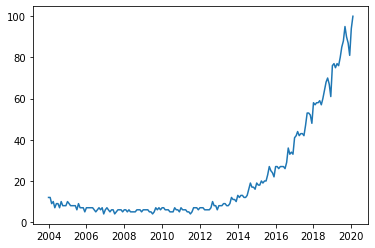

In [14]:
plt.plot(temporal['Mes'], temporal['data science'], label ='data science')

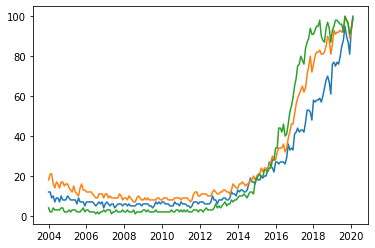

In [15]:
plt.plot(temporal['Mes'], temporal['data science'], label ='data science')
plt.plot(temporal['Mes'], temporal['machine learning'], label ='machine learning')
plt.plot(temporal['Mes'], temporal['deep learning'], label ='deep learning')

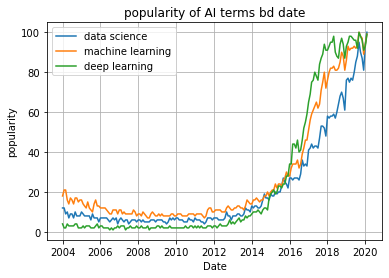

In [16]:
plt.plot(temporal['Mes'], temporal['data science'], label ='data science')
plt.plot(temporal['Mes'], temporal['machine learning'], label ='machine learning')
plt.plot(temporal['Mes'], temporal['deep learning'], label ='deep learning')
plt.xlabel('Date')
plt.ylabel('popularity')
plt.title('popularity of AI terms bd date')
plt.grid(True)
plt.legend()

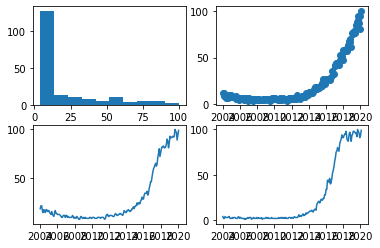

In [17]:
fig, axes = plt.subplots(2,2)
axes[0,0].hist(temporal['data science'])
axes[0,1].scatter(temporal['Mes'], temporal['data science'])
axes[1,0].plot(temporal['Mes'], temporal['machine learning'])
axes[1,1].plot(temporal['Mes'], temporal['deep learning'])

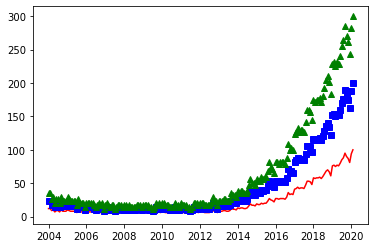

In [18]:
plt.plot(temporal['Mes'], temporal['data science'], 'r-')
plt.plot(temporal['Mes'], temporal['data science']*2, 'bs')
plt.plot(temporal['Mes'], temporal['data science']*3, 'g^')

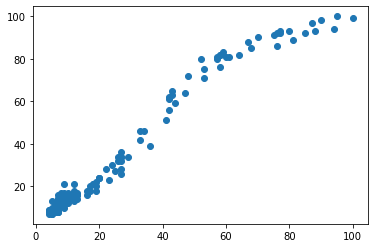

In [19]:
plt.scatter(temporal['data science'], temporal['machine learning'])

<BarContainer object of 194 artists>

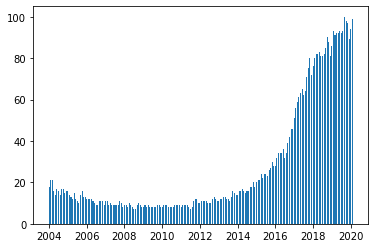

In [20]:
plt.bar(temporal['Mes'], temporal['machine learning'], width=20)

In [29]:
plt.plot(temporal['Mes'], temporal['data science'], label ='data science')
plt.plot(temporal['Mes'], temporal['machine learning'], label ='machine learning')
plt.plot(temporal['Mes'], temporal['deep learning'], label ='deep learning')
plt.xlabel('Date')
plt.ylabel('popularity')
plt.title('popularity of AI terms bd date')
plt.grid(True)
plt.text(x='2010-01-01', y=80, s=r'$\lambda=1, r^2=0.8$')
plt.annotate('Notice something?', xy=('2014-01-01', 30), xytext=('2006-01-01', 50), arrowprops={'facecolor':'red', 'shrink':0.05})

Text(2006-01-01, 50, 'Notice something?')

ConversionError: Failed to convert value(s) to axis units: '2010-01-01'

<Figure size 432x288 with 1 Axes>

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mes', ylabel='data science'>

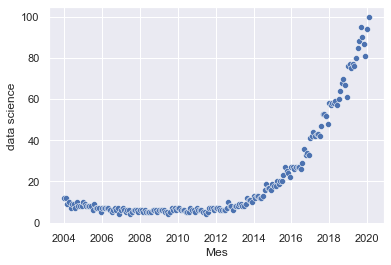

In [30]:
import seaborn as sns
sns.set()
sns.scatterplot(temporal['Mes'], temporal['data science'])

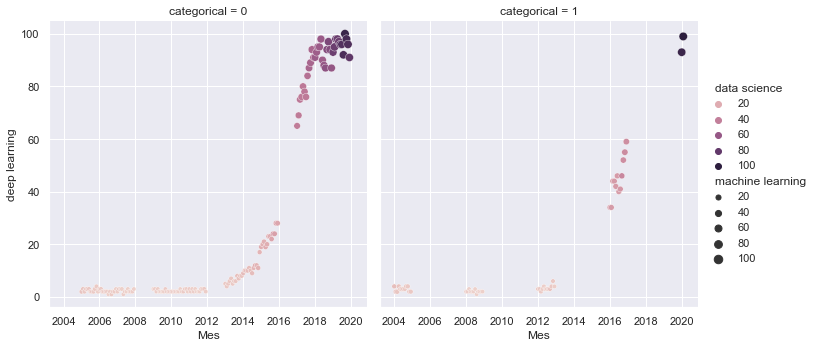

In [33]:
sns.relplot(x ='Mes', y = 'deep learning', hue = 'data science', size = 'machine learning', col = 'categorical', data = temporal)

<AxesSubplot:>

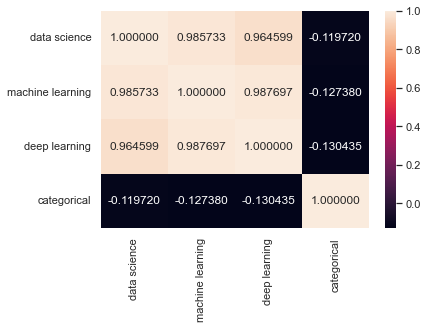

In [34]:
sns.heatmap(temporal.corr(), annot = True, fmt='2f')

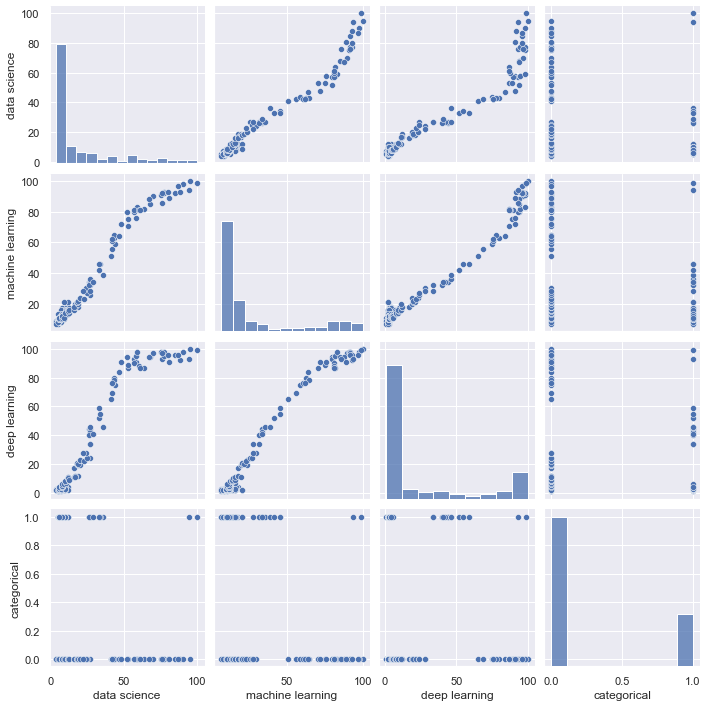

In [35]:
sns.pairplot(temporal)

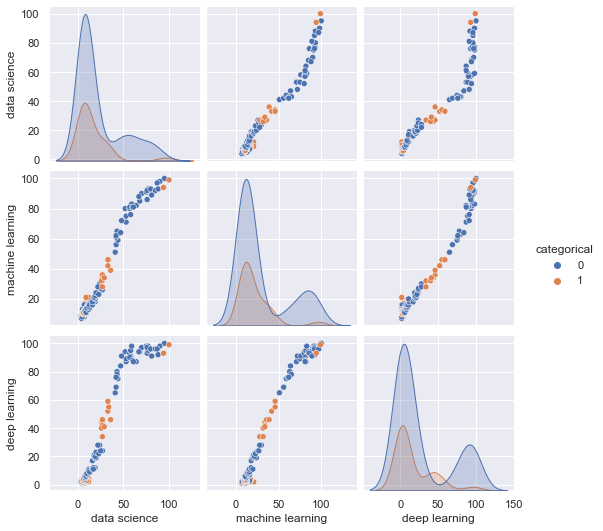

In [37]:
sns.pairplot(temporal, hue = 'categorical')

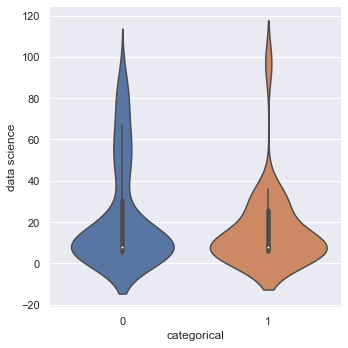

In [38]:
sns.catplot(x= 'categorical', y = 'data science', kind ='violin', data = temporal)

Text(0.5, 1.0, 'Machine Learning')

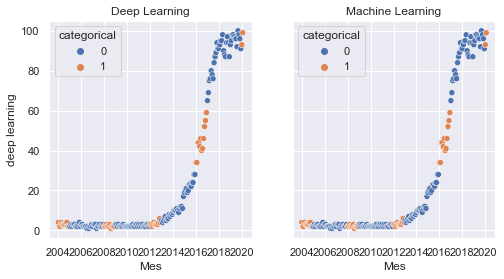

In [42]:
fig, axes = plt.subplots(1,2, sharey = True, figsize = (8, 4))
sns.scatterplot(x= 'Mes', y = 'deep learning', hue = 'categorical', data= temporal, ax = axes[0])
axes[0].set_title('Deep Learning')
sns.scatterplot(x= 'Mes', y = 'deep learning', hue = 'categorical', data= temporal, ax = axes[1])
axes[1].set_title('Machine Learning')
